In [2]:
import pandas as pd
import numpy as np
import os

In [2]:
train_df = pd.read_csv('../../data/cell_mask_study_30000.csv')

In [3]:
train_df.head()

,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,12,13,14,15,16,17,18,fold,total_cell_mask,selected_cells
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,8,7
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,15,15
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,2,17,16
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,17,17
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,45,43


## lets use only samples greater than 10. lets see how it goes

In [4]:
filtered_df_10_greater = train_df[(train_df['selected_cells'] >10) ] 

In [5]:
actual_cells = []
PATH = '../../data/train_h5_256_40000_v5/'
for i in filtered_df_10_greater['ID'].values:
    actual_cells.append(len(os.listdir(os.path.join(PATH, i))))
    

In [6]:
filtered_df_10_greater['actual_cells'] = actual_cells
filtered_df_10_greater.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,actual_cells
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,15,15,15
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,2,17,16,16
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,17,17,17
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,45,43,41
6,6,5f79a114-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,15,15,15


In [7]:
cells_count = 6
total_samples = filtered_df_10_greater.shape[0]

ID_list = []
count_list = []
count = []
Label_list = []
for i in range(total_samples):
#for i in range(2):
    info = filtered_df_10_greater.iloc[i]
    ids = info["ID"]
    actual_c = info["actual_cells"]
    label_c = info["Label"]
    cells_c = [v for v in range(1,actual_c+1)]
    for v in range(1, actual_c+1, cells_count):
        #print(v)
        start = v
        end = min(start+cells_count, actual_c+1)
        #print(f'start {start} end {end}')
        ID_list.append(ids)
        count_list.append([j for j in range(start,end)])
        count.append(len([j for j in range(start,end)]))
        Label_list.append(label_c)
     
    

In [10]:
ou_df = pd.DataFrame.from_dict({'ID':ID_list,"count_list":count_list, 'count': count, 'Label' : Label_list})

In [26]:
labels = [str(i) for i in range(19)]
for x in labels: ou_df[x] = ou_df['Label'].apply(lambda r: int(x in r.split('|')))
#ou_df.to_csv('../../data/ou.csv',index = False)
ou_df.head()
print(ou_df.dtypes)

ID            object
count_list    object
count          int64
Label         object
0              int64
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
dtype: object


In [15]:
type(ou_df['count_list'].values[0])

list

In [19]:
type(ou_df.iloc[0]['count_list'])

list

In [27]:
ou_df = pd.read_csv('../../data/ou.csv')
print(ou_df.dtypes)

ID            object
count_list    object
count          int64
Label         object
0              int64
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
dtype: object


In [28]:
ou_df['count_list'].values

array(['[1, 2, 3, 4, 5, 6]', '[7, 8, 9, 10, 11, 12]', '[13, 14, 15]', ...,
       '[13, 14, 15, 16, 17, 18]', '[19, 20, 21, 22, 23, 24]',
       '[25, 26, 27, 28, 29]'], dtype=object)

In [24]:
type(ou_df.iloc[0]['count_list'])

AttributeError: 'str' object has no attribute 'as_type'

## lets analyse our o2u

In [3]:
o2u_df = pd.read_csv('../../weights/O2U_v1/o2u.csv')
o2u_df.head()

,Unnamed: 0,ID,count_list,count,Label,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,...,epoch_90,epoch_91,epoch_92,epoch_93,epoch_94,epoch_95,epoch_96,epoch_97,epoch_98,epoch_99
0,0,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[1, 2, 3, 4, 5, 6]",6,14|0,0.016057,0.027950,0.015607,0.012221,0.018844,...,0.001076,0.002373,0.004013,0.006519,0.006409,0.002928,0.000150,0.002134,0.001261,0.001945
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[7, 8, 9, 10, 11, 12]",6,14|0,0.020058,0.026155,0.014625,0.015059,0.018048,...,0.010952,0.002026,0.004532,0.006413,0.002768,0.001249,0.001491,0.000702,0.000491,0.000136
2,2,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[13, 14, 15]",3,14|0,0.035290,0.023359,0.037913,0.018727,0.024730,...,0.005552,0.005597,0.002373,0.001533,0.000257,0.001769,0.000259,0.000564,0.000239,0.000004
3,3,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,"[1, 2, 3, 4, 5, 6]",6,6|1,0.043777,0.047811,0.039485,0.039398,0.029977,...,0.015802,0.019485,0.015783,0.014977,0.021565,0.010658,0.009766,0.006137,0.010020,0.012035
4,4,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,"[7, 8, 9, 10, 11, 12]",6,6|1,0.040270,0.044041,0.039449,0.040800,0.035749,...,0.017446,0.020342,0.016298,0.027953,0.023464,0.004477,0.024825,0.009243,0.014238,0.026480


In [6]:
def get_normalized_loss(df):
    #df = df.loc[:,['img_idx','loss']].set_index('img_idx')
    for i in range(0,100):
        #print(df[f'epoch_{i}'].mean())
        df[f'epoch_{i}'] = df[f'epoch_{i}'] - df[f'epoch_{i}'].mean()
        
    #print(os.path.basename(csv_name).split('_')[0])
    #df['loss'] = df['loss'] - df['loss'].mean()
    #return df.sort_index().add_prefix(os.path.basename(csv_name).split('_')[0] + '_')
    return df
o2u_normalized_df = get_normalized_loss(o2u_df)

In [7]:
o2u_normalized_df.head()

,Unnamed: 0,ID,count_list,count,Label,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,...,epoch_90,epoch_91,epoch_92,epoch_93,epoch_94,epoch_95,epoch_96,epoch_97,epoch_98,epoch_99
0,0,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[1, 2, 3, 4, 5, 6]",6,14|0,-0.012225,0.001512,-0.007744,-0.009950,-0.002649,...,-0.013166,-0.011399,-0.009212,-0.006032,-0.005543,-0.008351,-0.010500,-0.007939,-0.008385,-0.007409
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[7, 8, 9, 10, 11, 12]",6,14|0,-0.008224,-0.000283,-0.008727,-0.007111,-0.003445,...,-0.003290,-0.011746,-0.008692,-0.006138,-0.009184,-0.010030,-0.009159,-0.009371,-0.009154,-0.009218
2,2,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[13, 14, 15]",3,14|0,0.007008,-0.003078,0.014561,-0.003444,0.003237,...,-0.008690,-0.008175,-0.010852,-0.011018,-0.011696,-0.009510,-0.010391,-0.009509,-0.009406,-0.009350
3,3,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,"[1, 2, 3, 4, 5, 6]",6,6|1,0.015495,0.021373,0.016133,0.017228,0.008484,...,0.001559,0.005713,0.002558,0.002427,0.009612,-0.000621,-0.000884,-0.003936,0.000375,0.002682
4,4,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,"[7, 8, 9, 10, 11, 12]",6,6|1,0.011988,0.017604,0.016097,0.018629,0.014256,...,0.003204,0.006570,0.003073,0.015403,0.011511,-0.006802,0.014175,-0.000830,0.004593,0.017126


In [8]:
o2u_normalized_df['loss_avg'] = o2u_normalized_df[[f'epoch_{i}' for i in range(0,100)]].mean(axis='columns')
o2u_normalized_df = o2u_normalized_df.sort_values('loss_avg')

In [9]:
o2u_normalized_df.head(2)

,Unnamed: 0,ID,count_list,count,Label,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,...,epoch_91,epoch_92,epoch_93,epoch_94,epoch_95,epoch_96,epoch_97,epoch_98,epoch_99,loss_avg
9944,9944,ca521c7c-bb9f-11e8-b2b9-ac1f6b6435d0,"[1, 2, 3, 4, 5, 6]",6,14,-0.020174,-0.008994,-0.018928,-0.018669,-0.020472,...,-0.013668,-0.012987,-0.012547,-0.011938,-0.011020,-0.010642,-0.010063,-0.009644,-0.009200,-0.014733
73910,73910,08f85522-bbc8-11e8-b2bc-ac1f6b6435d0,"[13, 14, 15, 16, 17, 18]",6,14,-0.024206,-0.006967,-0.019111,-0.017941,-0.014636,...,-0.013629,-0.013187,-0.012436,-0.011923,-0.011275,-0.010603,-0.010068,-0.009645,-0.009242,-0.014614
6980,6980,b638debc-bb9d-11e8-b2b9-ac1f6b6435d0,"[1, 2, 3, 4, 5, 6]",6,7,-0.013555,-0.011753,-0.014794,-0.016687,-0.019568,...,-0.013343,-0.013196,-0.012530,-0.011779,-0.011256,-0.010642,-0.010012,-0.009645,-0.009349,-0.014577
55855,55855,8edda504-bbbc-11e8-b2ba-ac1f6b6435d0,"[7, 8, 9, 10, 11, 12]",6,14,-0.023166,-0.016815,-0.010001,-0.015218,-0.018229,...,-0.013702,-0.013221,-0.012399,-0.011936,-0.011205,-0.010416,-0.010065,-0.009631,-0.009329,-0.014531
55854,55854,8edda504-bbbc-11e8-b2ba-ac1f6b6435d0,"[1, 2, 3, 4, 5, 6]",6,14,-0.018208,-0.008037,-0.016557,-0.019174,-0.017707,...,-0.013703,-0.013152,-0.012536,-0.011910,-0.011125,-0.010614,-0.010060,-0.009632,-0.009348,-0.014519


remain: 70850

cutting line:
Unnamed: 0                                   48167
ID            b6e493d2-bbb7-11e8-b2ba-ac1f6b6435d0
count_list                                [19, 20]
count                                            2
Label                                      12|0|17
                              ...                 
epoch_96                                0.00802058
epoch_97                                0.00973914
epoch_98                                  0.013323
epoch_99                                  0.015904
loss_avg                                 0.0137102
Name: 48167, Length: 106, dtype: object


<AxesSubplot:>

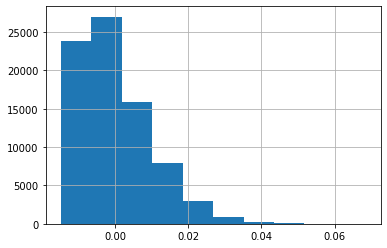

In [10]:
k=0.1
num_remain = int(len(o2u_normalized_df)*(1-k))
print('remain: ' + str(num_remain))
print('')
print('cutting line:')
print(o2u_normalized_df.iloc[num_remain])
o2u_normalized_df['loss_avg'].hist()

## now lets group unique samples together and see how they perform collectively

### lets add the label in a better consumable way 

In [20]:
labels = [str(i) for i in range(19)]
for x in labels: o2u_normalized_df[x] = o2u_normalized_df['Label'].apply(lambda r: int(x in r.split('|')))


#### checking if the groupby and mean are giving the results as expected. 

yes they are giving 

In [22]:
o2u_grouped = o2u_normalized_df.groupby('ID').mean()
o2u_grouped['loss_avg'] = o2u_grouped[[f'epoch_{i}' for i in range(0,100)]].mean(axis='columns')
o2u_grouped = o2u_grouped.sort_values('loss_avg')

remain: 17310

cutting line:
0.013473621238272181


<AxesSubplot:>

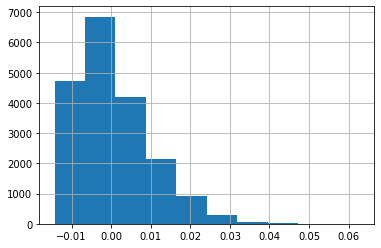

In [26]:
k=0.1
num_remain = int(len(o2u_grouped)*(1-k))
print('remain: ' + str(num_remain))
print('')
print('cutting line:')
print(o2u_grouped.iloc[num_remain]['loss_avg'])
o2u_grouped['loss_avg'].hist()

Total 19234 Outlier 1923


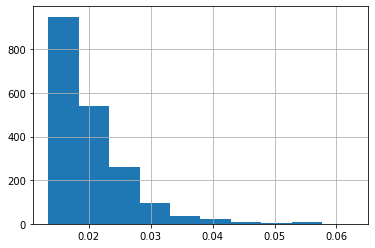

In [35]:
# histogram of values that are greater thatn cutting line
o2u_grouped[o2u_grouped['loss_avg']>0.013473621238272181]['loss_avg'].hist()
print(f'Total {len(o2u_grouped)} Outlier {len(o2u_grouped[o2u_grouped["loss_avg"]>0.013473621238272181])}')

In [45]:
o2u_grouped_saver = o2u_grouped.drop([f'epoch_{i}' for i in range(0,100)]+['Unnamed: 0'],axis=1)
o2u_grouped_saver.to_csv('../../weights/O2U_v1/groupled_v1.csv')

In [41]:
outliers_df = o2u_grouped[o2u_grouped["loss_avg"]>0.013473621238272181].drop([f'epoch_{i}' for i in range(0,100)]+['Unnamed: 0'],axis=1)
outliers_df.to_csv('../../weights/O2U_v1/outliers_v1.csv')
outliers_df.head()

,count,loss_avg,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
ID,,,,,,,,,,,,,,,,,,,,,
e603a12e-bba0-11e8-b2b9-ac1f6b6435d0,5.750000,0.013474,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01b79b30-bbb2-11e8-b2ba-ac1f6b6435d0,5.666667,0.013475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
b2cd3084-bbac-11e8-b2ba-ac1f6b6435d0,6.000000,0.013476,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10a0d844-bba5-11e8-b2ba-ac1f6b6435d0,6.000000,0.013491,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
47373902-bbc3-11e8-b2bc-ac1f6b6435d0,6.000000,0.013494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Now we will make the changes and remove the following samples and see what they are abt

data/train_fold_v9.csv

256

TOP = 51

In [49]:
train_fold_v9 = pd.read_csv('../../data/train_fold_v9.csv')
outliers_df = pd.read_csv('../../weights/O2U_v1/outliers_v1.csv')
print(train_fold_v9.shape)

(21495, 25)


In [51]:
## lets see how the classes are distributed before cleaning 
train_fold_v9[[f'{i}' for i in range(0,19)]].sum()

0     8630
1     1080
2     2406
3     1255
4     1414
5     1761
6      768
7     1831
8      952
9      980
10     807
11      72
12    1696
13    3049
14    1983
15     250
16    5579
17     581
18      32
dtype: int64

#### cleaning

In [55]:
train_fold_filtered_v9 = train_fold_v9[~train_fold_v9['ID'].isin(outliers_df['ID'].values)]
print(f'Before {train_fold_v9.shape} After {train_fold_filtered_v9.shape}')

Before (21495, 25) After (19595, 25)


In [56]:
train_fold_filtered_v9[[f'{i}' for i in range(0,19)]].sum()

0     7887
1      912
2     2101
3     1073
4     1201
5     1470
6      637
7     1646
8      778
9      726
10     731
11      20
12    1461
13    2632
14    1797
15     172
16    4906
17     426
18      22
dtype: int64

In [60]:
### lest split them

from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

SEED = 1
FOLDS = 5

labels = [str(i) for i in range(19)]

train_fold_filtered_v9 = train_fold_filtered_v9.reset_index(drop = True)

skf = MultilabelStratifiedKFold(n_splits=FOLDS, shuffle=True, 
          random_state=SEED)

train_fold_filtered_v9['fold'] = -1
for fold,(idxT,idxV) in enumerate( skf.split(train_fold_filtered_v9,train_fold_filtered_v9[labels].values)):
    train_fold_filtered_v9['fold'][idxV] = fold

train_fold_filtered_v9.to_csv('../../data/train_fold_filtered_v9.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
train_fold_filtered_v9.head(3)

,ID,total_cell_mask,selected_cells,Label,0,1,2,3,4,5,...,11,12,13,14,15,16,17,18,is_single,fold
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8,7,8|5|0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,1
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,15,15,14|0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,NaN,0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,17,16,6|1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0


<AxesSubplot:>

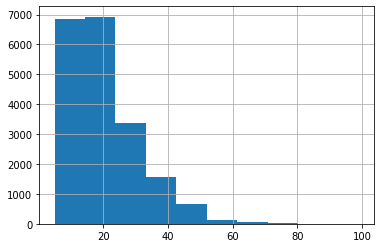

In [65]:
train_fold_filtered_v9['selected_cells'].hist()

In [89]:
train_fold_filtered_v9['is_single'] = train_fold_filtered_v9[[f'{i}' for i in range(0,19)]].sum(axis=1)

In [90]:
train_fold_filtered_v9["is_single"].max()

4

<AxesSubplot:>

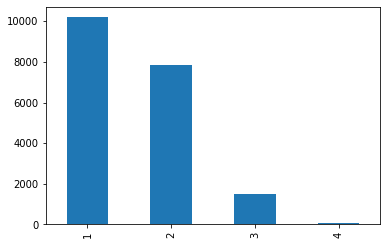

In [94]:
train_fold_filtered_v9["is_single"].value_counts().plot(kind='bar')

### lets see what we have removed 

In [62]:
what_we_removed = train_fold_v9[train_fold_v9['ID'].isin(outliers_df['ID'].values)]

In [83]:
what_we_removed['is_single'] = what_we_removed[[f'{i}' for i in range(0,19)]].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

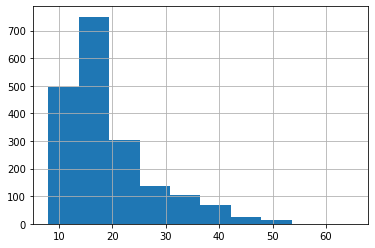

In [79]:
what_we_removed['selected_cells'].hist()

In [84]:
what_we_removed.head()

,ID,total_cell_mask,selected_cells,Label,0,1,2,3,4,5,...,11,12,13,14,15,16,17,18,is_single,fold
45,75dd487a-bb99-11e8-b2b9-ac1f6b6435d0,18,15,8|0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
46,730301da-bb99-11e8-b2b9-ac1f6b6435d0,11,11,12|8|4,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,3,0
56,781a9322-bb99-11e8-b2b9-ac1f6b6435d0,15,15,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
67,7ffe149c-bb99-11e8-b2b9-ac1f6b6435d0,20,20,8|1|0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2
106,98e4ee22-bb99-11e8-b2b9-ac1f6b6435d0,13,13,16|4|3|13,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,4,1


<AxesSubplot:>

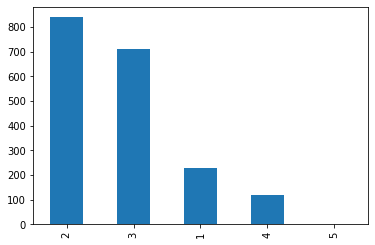

In [93]:
what_we_removed["is_single"].value_counts().plot(kind='bar')